# Data analysis for Car Data

## Objectives:

- Clean and manipulate raw data.
- Perform EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

## Data cleaning and manipulation

In [2]:
df = pd.read_csv('CarData.csv')
df.rename(columns={'mileage':'mileage(kmpl)','engine':'engine(CC)','max_power':'max_power(bhp)'},inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
print("Dataset initial shape:",df.shape)

Dataset initial shape: (8128, 13)


### 1. Null manipulation

In [4]:
print(df.isnull().sum())

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage(kmpl)     221
engine(CC)        221
max_power(bhp)    215
torque            222
seats             221
dtype: int64


Null values will be dropped for being few.

In [5]:
df.dropna(inplace=True)
print("Dataframe shape after dropping null values: ",df.shape)

Dataframe shape after dropping null values:  (7906, 13)


### 2. Duplicate values manipulation

In this case duplicate values do not add extra information and could potentially add model overfit, so they will be removed.

In [6]:
df.drop_duplicates(inplace=True)
print("Dataframe shape after dropping duplicate values: ",df.shape)

Dataframe shape after dropping duplicate values:  (6717, 13)


### 3. Converting mileage values in dataframe

Replacing mileage, engine and max power to float type.

In [7]:
df.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage(kmpl)      object
engine(CC)         object
max_power(bhp)     object
torque             object
seats             float64
dtype: object

In [8]:
mileage_arr = np.asarray(df['mileage(kmpl)'])
correct_mileage = []
for mileage in mileage_arr:
    mil, milt = mileage.split(" ")
    if milt == "km/kg":
        result = float(mil)*1.4
        correct_mileage.append(str(result))
    else: correct_mileage.append(mil)

df['mileage(kmpl)'] = correct_mileage
df["mileage(kmpl)"]= df["mileage(kmpl)"].astype(float)

In [9]:
engine_arr = np.asarray(df['engine(CC)'])
correct_engine = []
for engine in engine_arr:
    eng, engt = engine.split(" ")
    correct_engine.append(eng)

df['engine(CC)'] = correct_engine
df["engine(CC)"]= df["engine(CC)"].astype(float)

In [10]:
power_arr = np.asarray(df['max_power(bhp)'])
correct_power = []
for power in power_arr:
    pow, powt = power.split(" ")
    correct_power.append(pow)

df['max_power(bhp)'] = correct_power
df["max_power(bhp)"]= df["max_power(bhp)"].astype(float)

In [11]:
df.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage(kmpl)     float64
engine(CC)        float64
max_power(bhp)    float64
torque             object
seats             float64
dtype: object

### 4. Converting categorical

Converting categorical variables.

In [12]:
df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')

In [13]:
df.dtypes

name                object
year                 int64
selling_price        int64
km_driven            int64
fuel              category
seller_type       category
transmission      category
owner             category
mileage(kmpl)      float64
engine(CC)         float64
max_power(bhp)     float64
torque              object
seats              float64
dtype: object

## Exploratory Data Analysis

### 1. Numeric values descriptive statistics

In [14]:
df.describe()

,year,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(bhp),seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.578935,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.280333,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.500000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.540000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,14.000000


### 2. Numeric correlations

Determine how numeric data correlates with one another.

<AxesSubplot:>

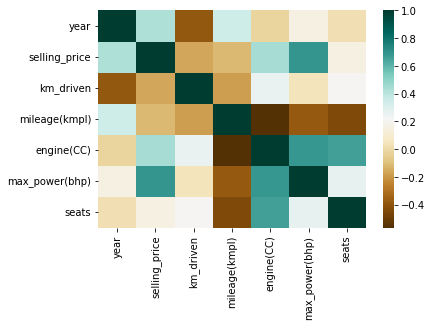

In [15]:
cor_data = df.corr()
sns.heatmap(cor_data,cmap="BrBG")

Text(0.5, 1.0, 'Selling price vs Max Power')

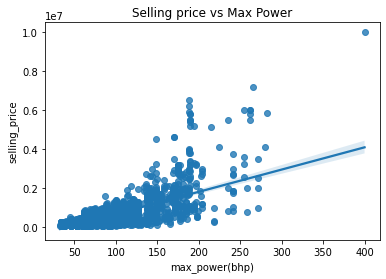

In [16]:
sns.regplot(data=df,x="max_power(bhp)",y="selling_price")
plt.title("Selling price vs Max Power")

Text(0.5, 1.0, 'Selling price vs Kms Driven')

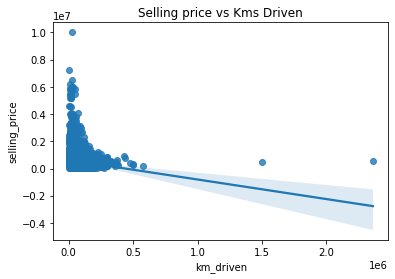

In [17]:
sns.regplot(data=df,x="km_driven",y="selling_price")
plt.title("Selling price vs Kms Driven")

The correlation map shows that the selling price may have a positive relationship between year, engine (cc) and max power (bhp). It may also have a negative relationship between km driven, mileage, while having almost no relationship with the amount of seats in the car.

### 3. VIF for Numerical variables

Calculating VIF for determining best independent variables in the dataset.

In [18]:
X = df.drop(['selling_price','name','seller_type','transmission','owner','fuel','torque'],axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         features         VIF
0            year  112.826829
1       km_driven    2.841779
2   mileage(kmpl)   33.378196
3      engine(CC)   37.688450
4  max_power(bhp)   19.175168
5           seats   64.602443


In this case, we are calculating the correlation between the independent variables. Optimally, we are looking that all variables have a VIF of <= 10. In this case, year has the highest VIF value, so the process will be done again to calculate the correlation without the year value.

In [19]:
X = df.drop(['selling_price','name','seller_type','transmission','owner','fuel','torque','year'],axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         features        VIF
0       km_driven   2.806853
1   mileage(kmpl)  12.368979
2      engine(CC)  37.571986
3  max_power(bhp)  17.175010
4           seats  39.847272


VIF values have decreased, however, engine (cc) and seats variables still have high VIF values.

In [20]:
X = df.drop(['selling_price','name','seller_type','transmission','owner','fuel','torque','year','seats','engine(CC)'],axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         features       VIF
0       km_driven  2.383302
1   mileage(kmpl)  5.176872
2  max_power(bhp)  5.266145


In this case, all km_driven, mileage(kmpl) and max_power(bhp) have VIFs of < 10. This is a good indicator that they may be good independent variables for the model.

### 4. Categorical variables correlation

Determining correlation between categorical variables and selling price.

In [21]:
cat_df = df[['selling_price','fuel','seller_type','transmission','owner']]

In [22]:
# Function to return dictionary for categorical variables
def GetVariableDict(df,colname):
    types_arr = np.asarray(df[colname].value_counts().index)
    ids_arr = [x+1 for x in range(len(types_arr))]
    return {types_arr[x]: ids_arr[x] for x in range(len(ids_arr))}

In [23]:
# Function to replace categorical variables with numbers
def ReplaceColumnValues(df,colname,coldict):
    col_values = df[colname]
    result = []
    for col in col_values:
        result.append(coldict[col])
    df[colname] = result

In [24]:
# Obtaining variables Dictionaries
fuel_dict = GetVariableDict(cat_df,'fuel')
seller_dict = GetVariableDict(cat_df,'seller_type')
trans_dict = GetVariableDict(cat_df,'transmission')
owner_dict = GetVariableDict(cat_df,'owner')

In [25]:
# Replacing column values
ReplaceColumnValues(cat_df,'fuel',fuel_dict)
ReplaceColumnValues(cat_df,'seller_type',seller_dict)
ReplaceColumnValues(cat_df,'transmission',trans_dict)
ReplaceColumnValues(cat_df,'owner',owner_dict)

D:\Programs\Python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

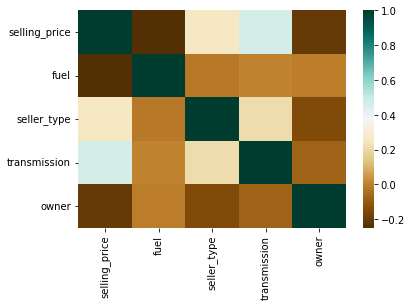

In [26]:
cat_corr_df = cat_df.corr()
sns.heatmap(cat_corr_df,cmap="BrBG")

All four categorical variables have no high correlation with selling price. However, seller type is the variable that has the least correlation out of the four variables.

### 5. Categorical variables VIF

Determining VIF for categorical variables.

In [27]:
X = cat_df.drop(['selling_price'],axis=1)
vif = pd.DataFrame()
vif['types'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

          types        VIF
0          fuel   6.679406
1   seller_type  10.306181
2  transmission  12.028930
3         owner   4.216743


Transmission variable has a VIF value of 12, so the process will be repeated without transmission variable.

In [28]:
X = cat_df.drop(['selling_price','transmission'],axis=1)
vif = pd.DataFrame()
vif['types'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         types       VIF
0         fuel  5.951893
1  seller_type  6.033533
2        owner  3.941030


Variables fuel, seller type and owner have VIF values below 10, which indicate that these variables have low colinearity, which means they can be good predictors for the model.

### 6. VIF values with Numeric and Categorical variables

Calculating VIF values between numeric and categorical values combined.

In [29]:
mixed_df = df[['selling_price','km_driven','mileage(kmpl)','max_power(bhp)','fuel','seller_type','owner']]
mixed_df

,selling_price,km_driven,mileage(kmpl),max_power(bhp),fuel,seller_type,owner
0,450000,145500,23.40,74.00,Diesel,Individual,First Owner
1,370000,120000,21.14,103.52,Diesel,Individual,Second Owner
2,158000,140000,17.70,78.00,Petrol,Individual,Third Owner
3,225000,127000,23.00,90.00,Diesel,Individual,First Owner
4,130000,120000,16.10,88.20,Petrol,Individual,First Owner
...,...,...,...,...,...,...,...
8121,260000,50000,18.90,67.10,Petrol,Individual,Second Owner
8122,475000,80000,22.54,88.73,Diesel,Individual,Second Owner
8123,320000,110000,18.50,82.85,Petrol,Individual,First Owner
8124,135000,119000,16.80,110.00,Diesel,Individual,Fourth & Above Owner


In [30]:
fuel_dict = GetVariableDict(mixed_df,'fuel')
seller_dict = GetVariableDict(mixed_df,'seller_type')
owner_dict = GetVariableDict(mixed_df,'owner')

ReplaceColumnValues(mixed_df,'fuel',fuel_dict)
ReplaceColumnValues(mixed_df,'seller_type',seller_dict)
ReplaceColumnValues(mixed_df,'owner',owner_dict)

D:\Programs\Python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

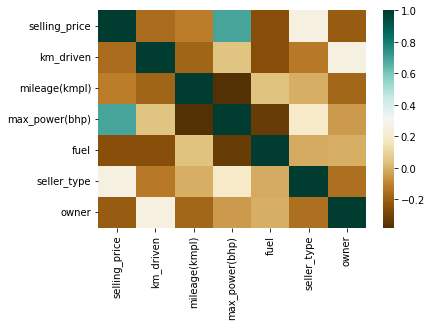

In [31]:
mixed_corr_df = mixed_df.corr()
sns.heatmap(mixed_corr_df,cmap="BrBG")

Based on the heatmap, all variables have no strong correlation with price.

In [32]:
X = mixed_df.drop(['selling_price'],axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         features        VIF
0       km_driven   2.735228
1   mileage(kmpl)  12.108638
2  max_power(bhp)   7.467318
3            fuel   7.424865
4     seller_type  12.400464
5           owner   5.082546


The VIF values between categorical and numeric values is relatively low, with mileage (kmpl) and seller type variables having values above 10.0. The process will be repeated without said variables.

In [33]:
X = mixed_df.drop(['selling_price','seller_type','mileage(kmpl)'],axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

         features       VIF
0       km_driven  2.682668
1  max_power(bhp)  4.633706
2            fuel  4.403799
3           owner  4.954278


Based on the VIF values calculated, the variables that are best for the model are:
- km_driven
- max_power(bhp)
- fuel
- owner

## Exporting final DF

In [34]:
final_df = mixed_df[['selling_price','km_driven','max_power(bhp)','fuel','owner']]
final_df.to_csv('ModelCarData.csv',index=True)